In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [2]:
data = pd.read_csv('customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
#data["TotalCharges"] = data['TotalCharges'].astype(float)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')
# it will convert all unconvertible strings to null

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [9]:
# 1. Data Manipulation:
# ● Extract the 5th column and store it in ‘customer_5’
# ● Extract the 15th column and store it in ‘customer_15’
# ● Extract all the male senior citizens whose payment method is electronic
# check and store the result in ‘senior_male_electronic’
# ● Extract all those customers whose tenure is greater than 70 months or
# their monthly charges is more than $100 and store the result in
# ‘customer_total_tenure’
# ● Extract all the customers whose contract is of two years, payment method
# is mailed check and the value of churn is ‘Yes’ and store the result in
# ‘two_mail_yes’
# ● Extract 333 random records from the customer_churndataframe and store
# the result in ‘customer_333’
# ● Get the count of different levels from the ‘Churn’ column 

In [10]:
# 1. Extract the 5th column and store it in ‘customer_5’
customer_5 = data.iloc[:, 4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

In [11]:
# 2. Extract the 15th column and store it in ‘customer_15’
customer_15 = data.iloc[:, 14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7032, dtype: object

In [12]:
# 3. Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = data[
    (data['gender'] == 'Male') & 
    (data['SeniorCitizen'] == 1) & 
    (data['PaymentMethod'] == 'Electronic check')
]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [13]:
# 4. Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = data[
    (data['tenure'] > 70) | 
    (data['MonthlyCharges'] > 100)
]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [14]:
# 5. Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = data[
    (data['Contract'] == 'Two year') & 
    (data['PaymentMethod'] == 'Mailed check') & 
    (data['Churn'] == 'Yes')
]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [15]:
# 6. Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
customer_333 = data.sample(n=333, random_state=42)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,4568-KNYWR,Male,0,No,No,52,Yes,No,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),63.25,3342.45,No
5681,2522-WLNSF,Female,1,Yes,No,34,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.30,No
830,9101-BWFSS,Female,0,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,No,Electronic check,108.55,5610.70,Yes
2143,4079-VTGLK,Male,1,Yes,No,30,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Electronic check,74.85,2181.75,No


In [16]:
# 7. Get the count of different levels from the ‘Churn’ column
churn_counts = data['Churn'].value_counts()
churn_counts

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [17]:
# 2. Data Visualization:
# ● Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange’
# ● Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
# ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
# y-axis &
# f. ‘Contract’ on the x-axis

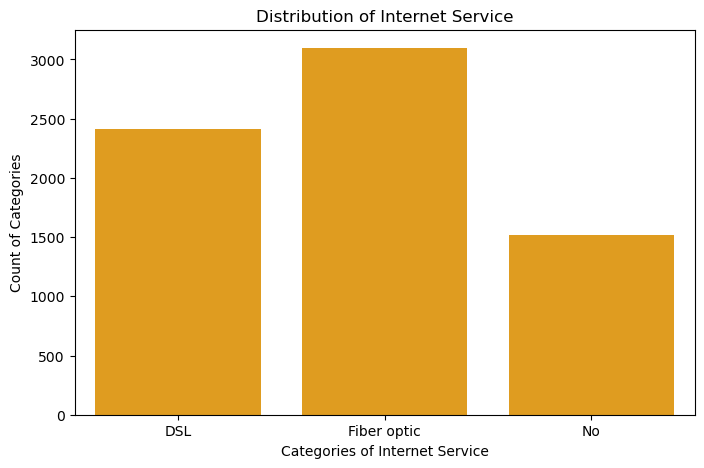

In [18]:
# ● Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange’
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', data=data, color='orange')

# Customize labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

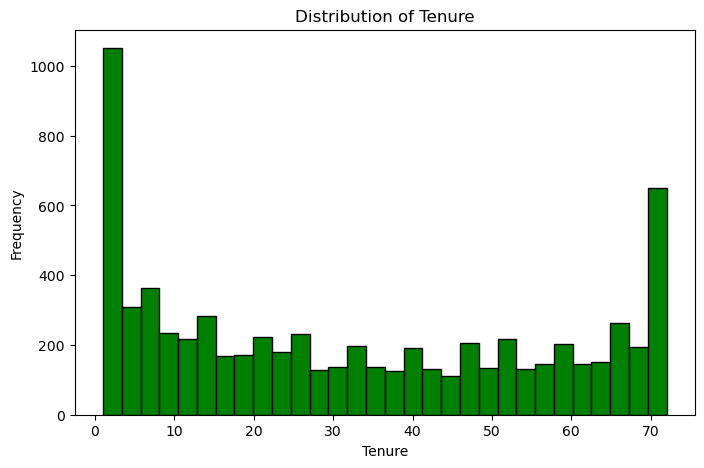

In [19]:
# ● Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’
plt.figure(figsize=(8,5))
plt.hist(data['tenure'], bins=30, color='green', edgecolor='black')

# Customize labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

In [20]:
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
# y-axis &
# f. ‘Contract’ on the x-axis


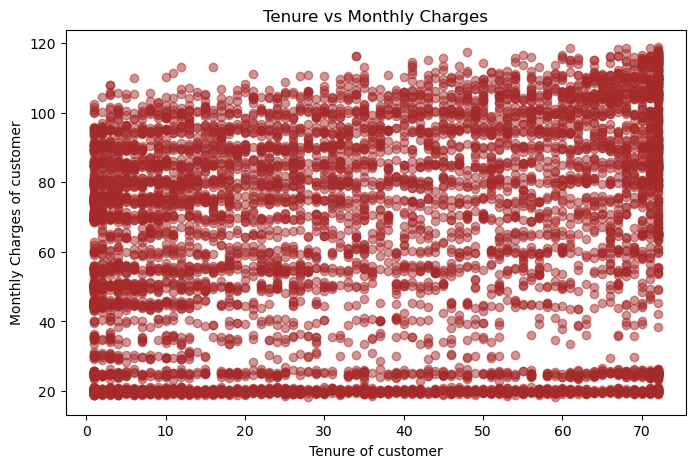

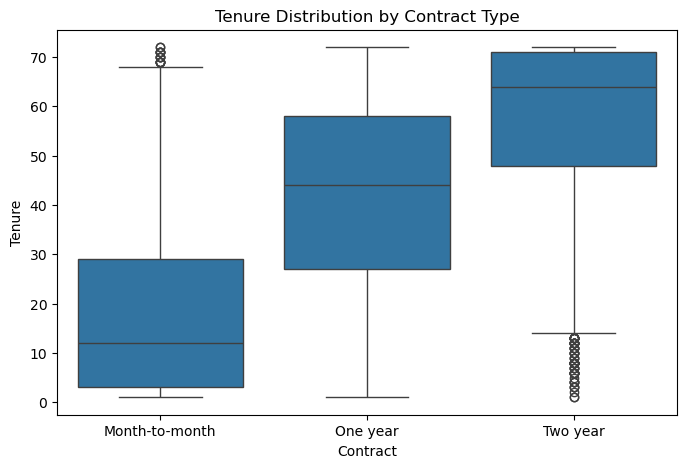

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(data['tenure'], data['MonthlyCharges'], color='brown', alpha=0.5)

# Customize labels and title
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='tenure', data=data)

# Customize labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure Distribution by Contract Type')
plt.show()

## **LINEAR RIGRESSION**

In [22]:
# Independent (X) and Dependent (y) Variables
X = data[['tenure']]  # Independent variable
y = data['MonthlyCharges']  # Dependent variable

# Split the Dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

In [24]:
# Predict on Test Data
y_pred = model.predict(X_test)
# Calculate R2 score
r2_score = r2_score(y_test,y_pred)
print(f'R2 score : {r2_score}')
# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Square Error (RMSE): {rmse:.4f}')
# Find the Error in Prediction
error = y_test - y_pred  # Actual - Predicted
print("\nError in Prediction:\n", error.head())

R2 score : 0.06755292455781181
Root Mean Square Error (RMSE): 28.9707

Error in Prediction:
 2481   -47.994813
6784   -35.943647
6125    43.370805
3052   -10.887004
4099   -27.370667
Name: MonthlyCharges, dtype: float64


Root Mean Square Error (RMSE) = 28.97, which means that on average, the model's predictions for MonthlyCharges deviate by about $28.97 from the actual values.

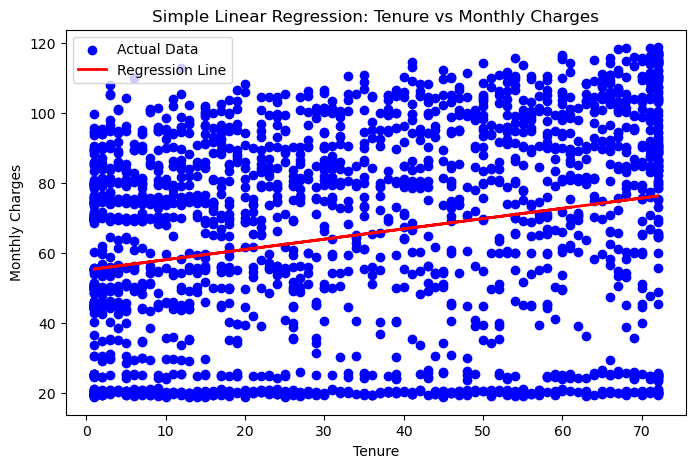

In [25]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Simple Linear Regression: Tenure vs Monthly Charges')
plt.legend()
plt.show()

## **LOGISTIC REGRESSION**

In [26]:
data.drop(columns = ['customerID'],inplace=True)

le = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        print(f'Column Name : {i}')
        print("Original ---> Encoded")
        for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
            print(f'{original_class}->{encoded_value}')
        print()

Column Name : gender
Original ---> Encoded
Female->0
Male->1

Column Name : Partner
Original ---> Encoded
No->0
Yes->1

Column Name : Dependents
Original ---> Encoded
No->0
Yes->1

Column Name : PhoneService
Original ---> Encoded
No->0
Yes->1

Column Name : MultipleLines
Original ---> Encoded
No->0
No phone service->1
Yes->2

Column Name : InternetService
Original ---> Encoded
DSL->0
Fiber optic->1
No->2

Column Name : OnlineSecurity
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : OnlineBackup
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : DeviceProtection
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : TechSupport
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : StreamingTV
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : StreamingMovies
Original ---> Encoded
No->0
No internet service->1
Yes->2

Column Name : Contract
Original ---> Encoded
Month-to-month->0
One y

In [27]:
# Define independent (X) and dependent (y) variable
X = data[['MonthlyCharges']]
y = data['Churn']

# Split the dataset (65% Train, 35% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [28]:
# Build the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predict on test data
y_pred = log_model.predict(X_test)

# Confusion Matrix & Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Simple Logistic Regression Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Simple Logistic Regression Accuracy: 0.7409

Confusion Matrix:
 [[1824    0]
 [ 638    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1824
           1       0.00      0.00      0.00       638

    accuracy                           0.74      2462
   macro avg       0.37      0.50      0.43      2462
weighted avg       0.55      0.74      0.63      2462



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## model is not predicting any churn correctly because the data is imbalanced, Using just MonthlyCharges might not be enough for the model to learn effective patterns.The model might need more features like tenure, Contract, or InternetService to make better predictions.

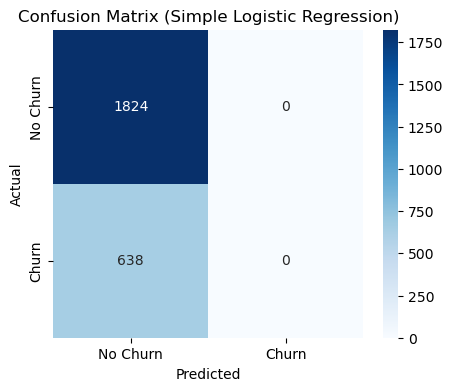

In [30]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simple Logistic Regression)')
plt.show()

In [31]:
### 2. Multiple Logistic Regression (Churn vs Tenure & MonthlyCharges)

# Define independent (X) and dependent (y) variables
X_multi = data[['tenure', 'MonthlyCharges']]
y_multi = data['Churn']

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)

# Build Multiple Logistic Regression Model
log_multi = LogisticRegression()
log_multi.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predict on test data
y_multi_pred = log_multi.predict(X_test)

# Confusion Matrix & Accuracy
conf_matrix_multi = confusion_matrix(y_test, y_multi_pred)
accuracy_multi = accuracy_score(y_test, y_multi_pred)

print(f'\n🔹 Multiple Logistic Regression Accuracy: {accuracy_multi:.4f}')
print('\nConfusion Matrix:\n', conf_matrix_multi)
print('\nClassification Report:\n', classification_report(y_test, y_multi_pred))



🔹 Multiple Logistic Regression Accuracy: 0.7797

Confusion Matrix:
 [[938  95]
 [215 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



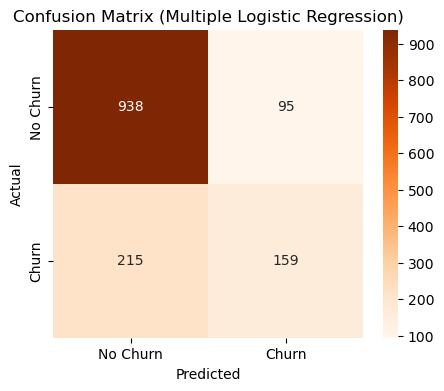

In [33]:
# Visualize Confusion Matrix for Multiple Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_multi, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Multiple Logistic Regression)')
plt.show()

## **DECISION TREE**

In [34]:
from sklearn.tree import plot_tree

# Define independent (X) and dependent (y) variable
X = data[['tenure']]  # Independent variable (tenure)
y = data['Churn']  # Dependent variable (Churn)

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Predict on test data
y_pred = dt_model.predict(X_test)

# Confusion Matrix & Accuracy
conf_matrix_dt = confusion_matrix(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred)

print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')
print('\nConfusion Matrix (Decision Tree):\n', conf_matrix_dt)

Decision Tree Accuracy: 0.7512

Confusion Matrix (Decision Tree):
 [[938  95]
 [255 119]]


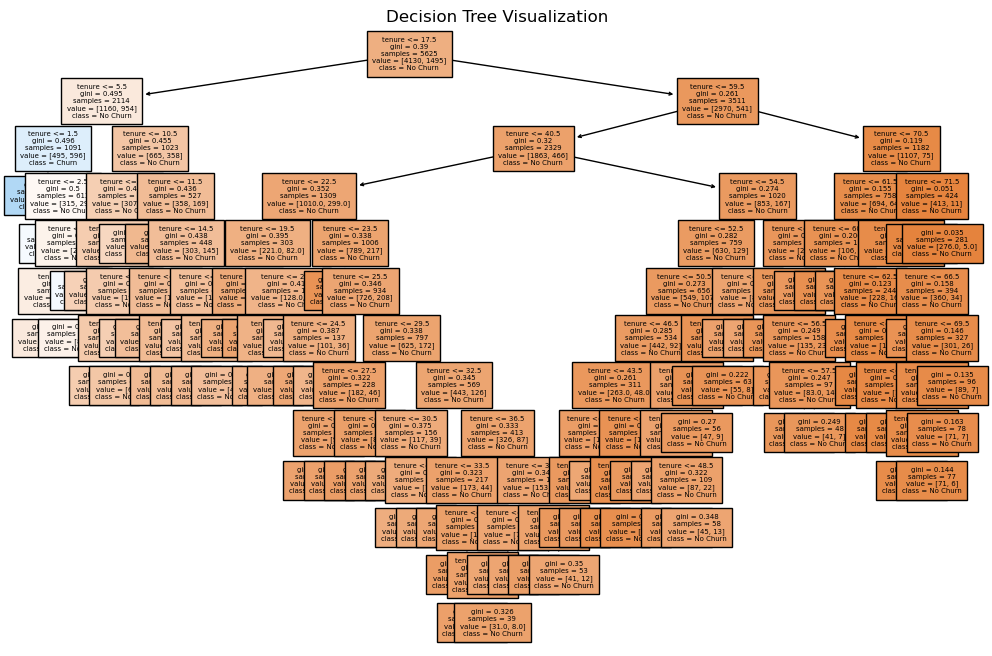

In [38]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=['tenure'], class_names=['No Churn', 'Churn'], fontsize=5)
plt.title('Decision Tree Visualization')
plt.show()

## **RANDOM FOREST**

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Define independent (X) and dependent (y) variables
X_rf = data[['tenure', 'MonthlyCharges']]  # Independent variables
y_rf = data['Churn']  # Dependent variable (Churn)

# Split dataset (70% Train, 30% Test)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30, random_state=42)

# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [40]:
# Predict on test data
y_rf_pred = rf_model.predict(X_test_rf)

# Confusion Matrix & Accuracy
conf_matrix_rf = confusion_matrix(y_test_rf, y_rf_pred)
accuracy_rf = accuracy_score(y_test_rf, y_rf_pred)

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('\nConfusion Matrix (Random Forest):\n', conf_matrix_rf)

Random Forest Accuracy: 0.7393

Confusion Matrix (Random Forest):
 [[1316  233]
 [ 317  244]]
